 # Assignment 2


An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this:

1. Python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data have been given is near **Ann Arbor, Michigan, United States**

<IPython.core.display.Javascript object>


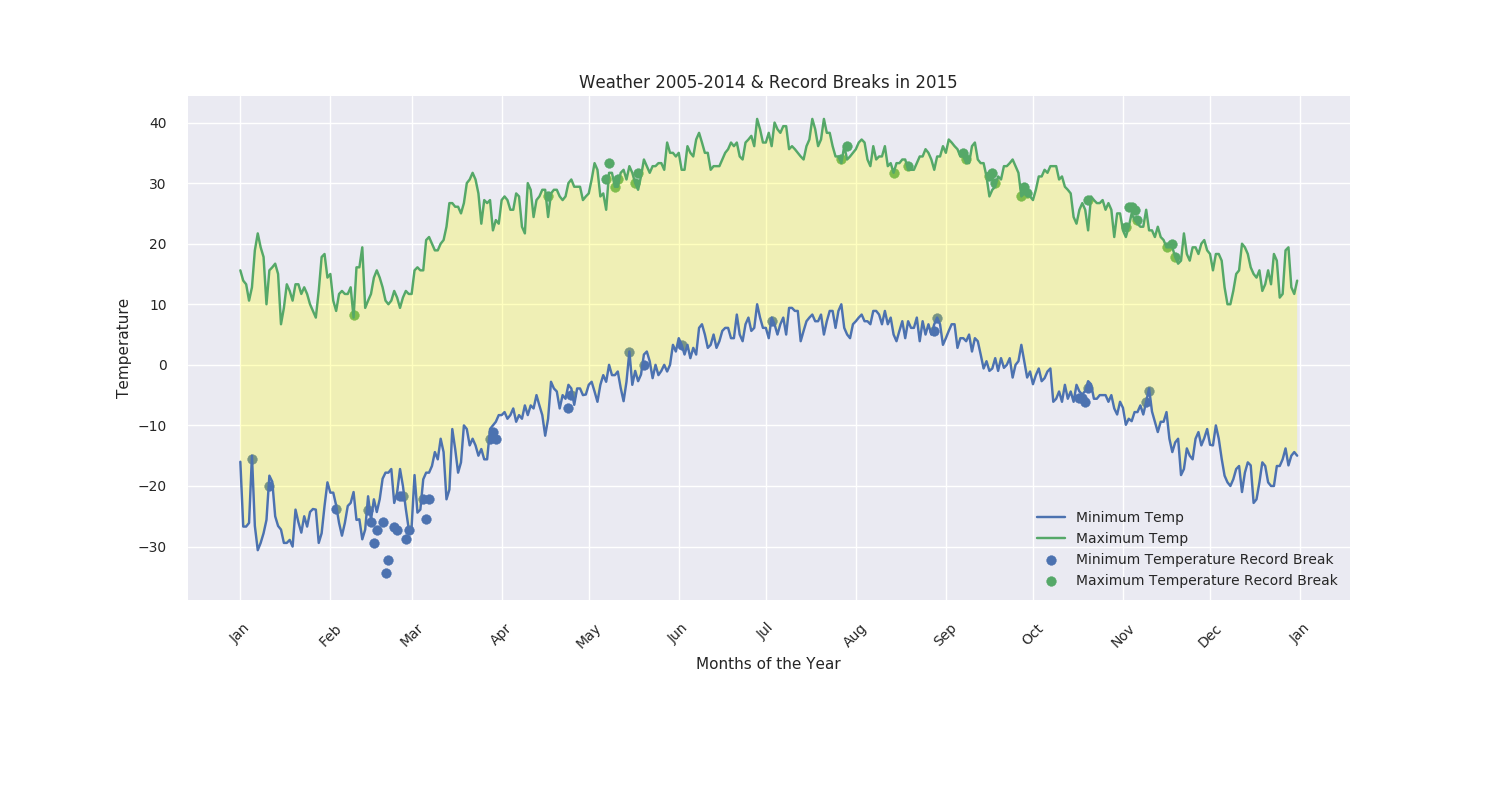

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

months = mdates.MonthLocator() # every month
dates = mdates.DayLocator()

f1=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
f1['Date']=pd.to_datetime(f1['Date'])
f2=f1[f1['Date'].isin(pd.date_range(start='20150101', end='20151201'))]

f1=f1[~f1.isin(f2)].dropna()
f1=f1[[any([a, b]) for a, b in zip(f1['Date'].dt.month != 2,f1['Date'].dt.day != 29 )]]
f1['Date']=f1['Date'].apply(lambda x: x.strftime("%m-%d"))
f1['Date']=pd.to_datetime(f1['Date'],format="%m-%d",errors='coerce')
f=f1.groupby(['Date'])['Data_Value'].agg({'MAX': 'max','MIN': 'min'})
f['MAX']=f['MAX']/10
f['MIN']=f['MIN']/10

f2['Date']=f2['Date'].apply(lambda x: x.strftime("%m-%d"))
f2['Date']=pd.to_datetime(f2['Date'],format="%m-%d",errors='coerce')
f2=f2.groupby(['Date'])['Data_Value'].agg({'MAX': 'max','MIN': 'min'})
f2['MAX']=f2['MAX']/10
f2['MIN']=f2['MIN']/10

f3=f.reset_index()
f2=f2.reset_index()
f3=f3.merge(f2,on='Date',how="inner").set_index('Date')
x1 = f3[ (f3['MIN_y'] <= f3['MIN_x'])].index
y1=f3[ (f3['MIN_y'] <= f3['MIN_x'])]['MIN_y']
x2 = f3[ (f3['MAX_y'] >= f3['MAX_x'])].index
y2=f3[ (f3['MAX_y'] >= f3['MAX_x'])]['MAX_y']



fig, ax = plt.subplots()
a=np.array(f.index)
l,=plt.plot(f['MIN'],'-',label='Minimum Temp')
m,=plt.plot(f['MAX'],'-',label='Maximum Temp')
j=plt.scatter(x1,y1,label='Minimum Temperature Record Break')
k=plt.scatter(x2,y2,label='Maximum Temperature Record Break')
plt.legend(handles=[l,m,j,k])
#plt.legend((j,k,l,m),('','',"",""))

#plt.legend()
plt.gca().fill_between(a, f['MIN'], f['MAX'],facecolor='yellow',  alpha=0.25)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(dates)
monthFmt = mdates.DateFormatter('%b')

ax.xaxis.set_major_formatter(monthFmt) 
 

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

#plt.legend(['Low Temp', 'High Temp'])
ax.set_xlabel('Months of the Year')
ax.set_ylabel('Temperature')
ax.set_title('Weather 2005-2014 & Record Breaks in 2015')

plt.subplots_adjust(bottom=0.25)
ax.tick_params(direction='out', pad=15)
ax.grid(True)

fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()


